In [405]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from IPython.display import display, Latex
from scipy.constants import g
from sklearn.metrics import r2_score

In [406]:
# importing local modules
import sys
sys.path.append('...\\...\\utility')

from utility import plots

In [407]:
# Setting up the plots
plots.set_style()

In [408]:
def process_periods(periods):
    """
    Processes the periods of oscillation
    """
    # Calculating the average period and standard deviation
    period_avg = np.mean(periods)
    period_std = np.std(periods)/np.sqrt(len(periods))
    period = ufloat(period_avg, period_std)
    natural_frequency = 1/period
    natural_angular_frequency = 2*np.pi*natural_frequency
    return period, natural_frequency, natural_angular_frequency

# Part 1: Measuring spring constants
For the three (supposedly identical) spring, we're measuring the displacement using a meter stick while increasing mass from 50g to 130g in steps of 20g (5 measurements).

In [409]:
spring_1_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_1_displacement = np.array([14.0, 19.5, 25.0, 30.5, 36.3])*1E-2 # in m

In [410]:
spring_1_force = spring_1_mass*g # in N

In [411]:
def linear_fit(x, y):
    """
    Fits a linear function to the data
    """
    fit, cov = np.polyfit(x, y, 1, cov = True)
    fit_fn = np.poly1d(fit)
    R2 = r2_score(y, fit_fn(x))
    err = np.sqrt(np.diag(cov))
    return [ufloat(fit[0], err[0]), ufloat(fit[1], err[1])], fit_fn, R2

In [412]:
def umean(x):
    """
    Calculates the mean of an array of uncertainties
    """
    epsilon = unumpy.nominal_values(x).mean()/(1e12)
    wavg = ufloat(sum([v.n/(v.s**2+epsilon) for v in x])/sum([1/(v.s**2+epsilon) for v in x]),
                  np.sqrt(len(x)/sum([1/(v.s**2+epsilon) for v in x])))
    return wavg


In [413]:
# Plotting the force vs displacement and fit using np.polyfit for spring 1
fit, fit_fn_1, R2_1 = linear_fit(spring_1_displacement, spring_1_force)
spring_1_k = fit[0]
display(Latex('Spring 1 spring constant: ${:L}$ N/m'.format(spring_1_k)))

<IPython.core.display.Latex object>

In [414]:
# Repeat for spring 2
spring_2_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_2_displacement = np.array([14.5, 20.0, 25.7, 31.5, 37.0])*1E-2 # in m

In [415]:
spring_2_force = spring_2_mass*9.81 # in N

In [416]:
# Plotting the force vs displacement and fit using np.polyfit for spring 2
fit, fit_fn_2, R2_2= linear_fit(spring_2_displacement, spring_2_force)
spring_2_k = fit[0]
display(Latex('Spring 2 spring constant: ${:L}$ N/m'.format(spring_2_k)))

<IPython.core.display.Latex object>

In [417]:
# Repeat for spring 3
spring_3_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_3_displacement = np.array([13.0, 18.5, 24.0, 29.5, 35.2])*1E-2 # in m

In [418]:
spring_3_force = spring_3_mass*9.81 # in N

In [419]:
# Plotting the force vs displacement and fit using np.polyfit for spring 3
fit, fit_fn_3, R2_3 = linear_fit(spring_3_displacement, spring_3_force)
spring_3_k = fit[0]
display(Latex('Spring 3 spring constant: ${:L}$ N/m'.format(spring_3_k)))

<IPython.core.display.Latex object>

In [420]:
# List of spring constants
spring_constants = np.array([spring_1_k, spring_2_k, spring_3_k])
display(Latex('Spring constants: 1: ${:L}$ N/m,   2: ${:L}$ N/m,   3: ${:L}$ N/m'.format(spring_constants[0], spring_constants[1], spring_constants[2])))

<IPython.core.display.Latex object>

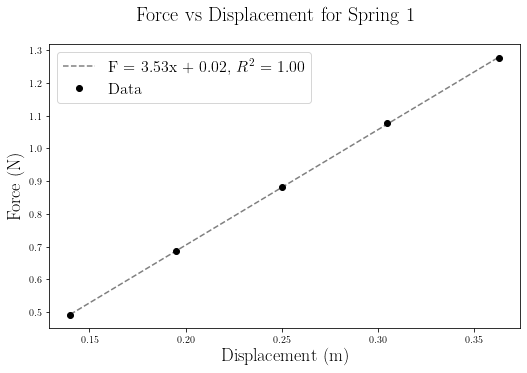

In [421]:
# Plotting first spring
fig, ax = plt.subplots(1, 1, figsize = plots.set_size('default', fraction = 1.3))

ax.plot(spring_1_displacement, fit_fn_1(spring_1_displacement), '--', label = "F = {:.2f}x + {:.2f}".format(spring_1_k.n, spring_1_k.s) + ", $R^2$ = {:.2f}".format(R2_1), color = "grey")
ax.plot(spring_1_displacement, spring_1_force, 'o', label = 'Data', color = "black")
ax.set_ylabel('Force (N)', fontsize = 18)
ax.set_xlabel('Displacement (m)', fontsize = 18)
ax.legend(fontsize = 16)

# set title for the figure above the subplots
fig.suptitle('Force vs Displacement for Spring 1', fontsize = 20)
# move title down
fig.subplots_adjust(top = 0.88)

plt.savefig('../figures/spring_constant_1.pdf')

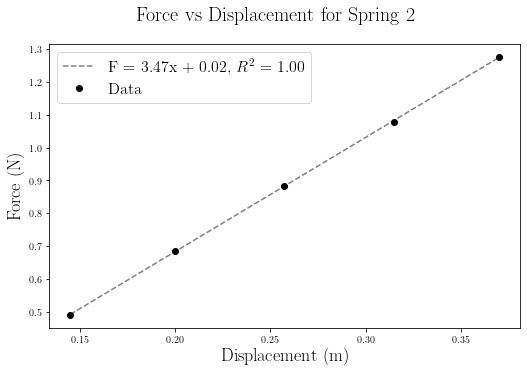

In [422]:
# Plotting second spring
fig, ax = plt.subplots(1, 1, figsize = plots.set_size('default', fraction = 1.3))

ax.plot(spring_2_displacement, fit_fn_2(spring_2_displacement), '--', label = "F = {:.2f}x + {:.2f}".format(spring_2_k.n, spring_2_k.s) + ", $R^2$ = {:.2f}".format(R2_2), color = "grey")
ax.plot(spring_2_displacement, spring_2_force, 'o', label = 'Data', color = "black")
ax.set_ylabel('Force (N)', fontsize = 18)
ax.set_xlabel('Displacement (m)', fontsize = 18)
ax.legend(fontsize = 16)

# set title for the figure above the subplots
fig.suptitle('Force vs Displacement for Spring 2', fontsize = 20)
# move title down
fig.subplots_adjust(top = 0.88)

plt.savefig('../figures/spring_constant_2.pdf')

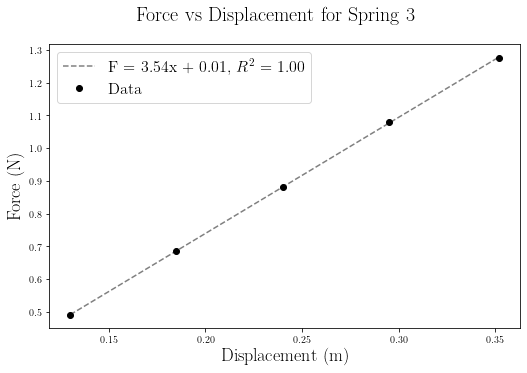

In [423]:
# Plotting third spring
fig, ax = plt.subplots(1, 1, figsize = plots.set_size('default', fraction = 1.3))

ax.plot(spring_3_displacement, fit_fn_3(spring_3_displacement), '--', label = "F = {:.2f}x + {:.2f}".format(spring_3_k.n, spring_3_k.s) + ", $R^2$ = {:.2f}".format(R2_3), color = "grey")
ax.plot(spring_3_displacement, spring_3_force, 'o', label = 'Data', color = "black")
ax.set_ylabel('Force (N)', fontsize = 18)
ax.set_xlabel('Displacement (m)', fontsize = 18)
ax.legend(fontsize = 16)

# set title for the figure above the subplots
fig.suptitle('Force vs Displacement for Spring 3', fontsize = 20)
# move title down
fig.subplots_adjust(top = 0.88)

plt.savefig('../figures/spring_constant_3.pdf')

In [424]:
# Calculating the average spring constant and standard deviation
spring_constant = umean(spring_constants)
display(Latex('Average spring constant: ${:L}$ N/m'.format(spring_constant)))

<IPython.core.display.Latex object>

# Part 2: The forced, damped, harmonic oscillator
 - Calculate the period of the oscillator with no driving force
  - Calculate the natural frequency of the oscillator $f_0$ and the natural angular frequency $\omega_0$

In [425]:
# Mass of air carts in kg
air_cart_masses = unumpy.uarray([207.9, 206.4], [0.05, 0.05])*1E-3

In [426]:
# Measurements of period of oscillation with no driving force along with calculated natural frequency and angular frequency
periods = np.array([1.11, 0.96, 0.89, 1.11, 1.08, 1.09, 0.98, 1.03, 1.37, 1.14]) # in s
period, natural_frequency, natural_angular_frequency = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Calculating the theoretical natural frequency and angular frequency


In [427]:
def natural_frequencies(spring_constant, total_mass):
    natural_angular_frequency_theory = unumpy.sqrt(2*spring_constant/total_mass)
    natural_frequency_theory = natural_angular_frequency_theory/(2*np.pi)
    return natural_frequency_theory, natural_angular_frequency_theory

In [428]:
# Calculating the theoretical natural frequency and angular frequency for single cart
natural_frequency_theory_single, natural_angular_frequency_theory_single = natural_frequencies(spring_constant, air_cart_masses[0])
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_single)))
display(Latex('Theoretical natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency_theory_single)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Turning on the driving force
- Set driving frequency to 0.5 Hz from predicted resonance frequency
- Increase by 0.1 Hz until withing 0.05 Hz of resonance frequency, then increase by 0.01 Hz.
- Once the resonance frequency is passed by 0.05 Hz, increase by 0.1 Hz for 4 or 5 measurements.

In [429]:
# Theoretical resonance frequency
resonance_frequency_theory_single = natural_frequency_theory_single
display(Latex('Theoretical resonance frequency: ${:L}$ Hz'.format(resonance_frequency_theory_single)))

<IPython.core.display.Latex object>

In [430]:
# Measured resonance frequency for single air cart
driving_frequency_std = 0.0005 # in Hz
oscillation_amplitude_std = 0.005E-2 # in m
driving_frequency = np.array([0.410, 0.513, 0.607, 0.708, 0.805, 0.874, 0.883, 0.895, 0.911, 0.920, 0.924, 0.937, 0.949, 0.992, 1.016, 1.118, 1.216, 1.333]) # in Hz
oscillation_amplitude = np.array([0.3, 0.35, 0.45, 0.5, 0.9, 3.5, 4.5, 11.0, 11.5, 11.5, 5.5, 2.5, 1.5, 0.9, 0.6, 0.4, 0.3, 0.2])*1E-2 # in m

driving_frequency_single = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_single = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))

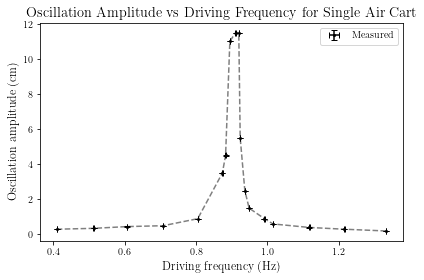

In [431]:
# Plotting the amplitude of oscillation vs driving frequency
fig, ax = plt.subplots(1, 1, figsize=plots.set_size('default', fraction=1))
ax.plot(unumpy.nominal_values(driving_frequency_single), unumpy.nominal_values(oscillation_amplitude_single)*1E2, color = "grey", linestyle = "--")
ax.errorbar(unumpy.nominal_values(driving_frequency_single), unumpy.nominal_values(oscillation_amplitude_single)*1E2,
            xerr = unumpy.std_devs(driving_frequency_single), yerr = unumpy.std_devs(oscillation_amplitude_single)*1E2, fmt='o',label='Measured', capsize=3, capthick=1, color = "black", ms = 2)
ax.set_xlabel('Driving frequency (Hz)')
ax.set_ylabel('Oscillation amplitude (cm)')
ax.set_title('Oscillation Amplitude vs Driving Frequency for Single Air Cart')
ax.legend()
# plt.savefig('../figures/oscillation_amplitude_vs_driving_frequency_single.pdf', dpi = 300)

In [445]:
# get the resonance frequency
max = np.max(oscillation_amplitude_single)
print(max)
resonance_frequency_single = driving_frequency_single[oscillation_amplitude_single == max][0]
display(Latex('Resonance frequency: ${:L}$ Hz'.format(resonance_frequency_single)))

0.11500+/-0.00005


<IPython.core.display.Latex object>

# Adding weight to the single air cart, drived system

In [433]:
# measuring period of oscillation with no driving force
periods = np.array([1.08, 1.16, 1.18, 1.18, 1.06, 1.13, 1.10, 1.13, 1.18, 1.13]) # in s
period, natural_frequency, natural_angular_frequency = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [434]:
# Theoretical resonance frequency for single air cart with weight of 20 g
added_mass = 20E-3 # in kg
natural_frequency_theory_single_weight, natural_angular_frequency_theory_single_weight = natural_frequencies(spring_constant, air_cart_masses[0] + added_mass)
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_single_weight)))
display(Latex('Theoretical natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency_theory_single_weight)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [435]:
# Measured resonance frequency for single air cart with weight of 50 g  (NOT FINISHED, REDO EVENTUALLY)
driving_frequency= np.array([0.187, 0.269, 0.380, 0.486, 0.593, 0.696, 0.770, 0.795, 0.809, 0.820, 0.840, 0.855, 0.869, 0.885, 0.908, 0.924, 0.955, 0.973, 1.053, 1.205, 1.304]) # in Hz
oscillation_amplitude = np.array([2.4, 1.2, 0.8, 0.8, 0.9, 1.2, 2.2, 2.3, 1.8, 2.1, 4.1, 5.2, 39.5-24.6, 38.2 - 26.0, 35.5 - 27.8, 34.2- 30, 33.7-30.5, 2.2, 1.4, 0.8, 0.7])*1E-2 # in m

driving_frequency_single_weight = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_single_weight = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))

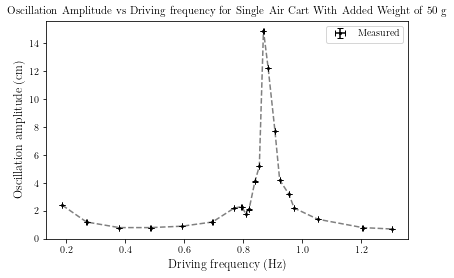

In [436]:
# Plotting the amplitude of oscillation vs driving frequency for single air cart with weight of added 50 g
fig, ax = plt.subplots(1, 1, figsize=plots.set_size('default', fraction=1))
ax.plot(unumpy.nominal_values(driving_frequency_single_weight), unumpy.nominal_values(oscillation_amplitude_single_weight)*1E2, color = "grey", linestyle = "--")
ax.errorbar(unumpy.nominal_values(driving_frequency_single_weight), unumpy.nominal_values(oscillation_amplitude_single_weight)*1E2,
            xerr = unumpy.std_devs(driving_frequency_single_weight), yerr = unumpy.std_devs(oscillation_amplitude_single_weight)*1E2, fmt='o',label='Measured', capsize=3, capthick=1, color = "black", ms = 2)
ax.set_xlabel('Driving frequency (Hz)')
ax.set_ylabel('Oscillation amplitude (cm)')
ax.set_title('Oscillation Amplitude vs Driving frequency for Single Air Cart With Added Weight of 50 g')
# make title font smaller
ax.title.set_fontsize(11)
ax.legend()
# plt.savefig('../figures/oscillation_amplitude_vs_driving_frequency_single_weight.pdf', dpi = 300)

In [437]:
# get the resonance frequency
max = np.max(oscillation_amplitude_single_weight)
resonance_frequency = driving_frequency_single_weight[oscillation_amplitude_single_weight == max][0]
display(Latex('Resonance frequency: ${:L}$ Hz'.format(resonance_frequency)))

<IPython.core.display.Latex object>

# Two Air Tracks


In [438]:
# measuring periods
periods1 = np.array([1.58, 1.56, 1.58, 1.55, 1.50, 1.45, 1.46, 1.58, 1.40, 1.53])
period1, natural_frequency1, natural_angular_frequency1 = process_periods(periods)
display(Latex('Average period: ${:L}$ s'.format(period)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [439]:
periods2 = np.array([0.98, 0.83, 0.90, 0.86, 0.86, 0.85, 0.85, 0.83, 0.94, 0.95])
period2, natural_frequency2, natural_angular_frequency2 = process_periods(periods2)
display(Latex('Average period: ${:L}$ s'.format(period2)))
display(Latex('Natural frequency: ${:L}$ Hz'.format(natural_frequency2)))
display(Latex('Natural angular frequency: ${:L}$ rad/s'.format(natural_angular_frequency2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [440]:
# Calculating the theoretical natural frequency and angular frequency for two carts
natural_frequency_theory_two, natural_angular_frequency_theory_two = natural_frequencies(spring_constant, air_cart_masses[0])
display(Latex('Theoretical natural frequency: ${:L}$ Hz'.format(natural_frequency_theory_two)))

<IPython.core.display.Latex object>

In [441]:
# Theoretical resonance frequency for two air carts
resonance_frequency_theory_two = (natural_frequency_theory_two*unumpy.sqrt(1/2), natural_frequency_theory_two*unumpy.sqrt(3/2))
display(Latex('Theoretical resonance frequency 1: ${:L}$ Hz'.format(resonance_frequency_theory_two[0])))
display(Latex('Theoretical resonance frequency 2: ${:L}$ Hz'.format(resonance_frequency_theory_two[1])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [442]:
# measuring resonance frequencies
driving_frequency = np.array([0.186, 0.289, 0.388, 0.490, 0.584, 0.620, 0.636, 0.649, 0.658, 0.688, 0.708, 0.761, 0.815, 0.886, 0.928, 0.997, 1.055, 1.130, 1.217, 1.322, 1.401, 1.499, 1.602, 2.026, 2.512]) # in Hz
oscillation_amplitude = np.array([0.4, 0.8, 0.4, 0.4, 2.2, 4.0, 5.5, 37.5-19.5, 36.5-20.0, 31.5-26, 2, 1.6, 1, 0.6, 1.5, 3.5, 4.2, 6, 3.5, 3, 2.2, 1.3, 0.7, 0.3, 0.2])*1E-2 # in m

driving_frequency_double = unumpy.uarray(driving_frequency, np.full(len(driving_frequency), driving_frequency_std, dtype = float))
oscillation_amplitude_double = unumpy.uarray(oscillation_amplitude, np.full(len(oscillation_amplitude), oscillation_amplitude_std, dtype = float))

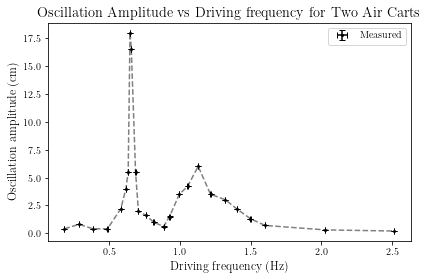

In [443]:
# Plotting the amplitude of oscillation vs driving frequency for two air carts
fig, ax = plt.subplots(1, 1, figsize=plots.set_size('default', fraction=1))
ax.plot(unumpy.nominal_values(driving_frequency_double), unumpy.nominal_values(oscillation_amplitude_double)*1E2, color = "grey", linestyle = "--")
ax.errorbar(unumpy.nominal_values(driving_frequency_double), unumpy.nominal_values(oscillation_amplitude_double)*1E2,
            xerr = unumpy.std_devs(driving_frequency_double), yerr = unumpy.std_devs(oscillation_amplitude_double)*1E2, fmt='o',label='Measured', capsize=3, capthick=1, color = "black", ms = 2)
ax.set_xlabel('Driving frequency (Hz)')
ax.set_ylabel('Oscillation amplitude (cm)')
ax.set_title('Oscillation Amplitude vs Driving frequency for Two Air Carts')
ax.legend()
plt.savefig('../figures/oscillation_amplitude_vs_driving_frequency_double.pdf', dpi = 300)

In [444]:
# get two frequencies with the highest amplitude
max1 = np.max(oscillation_amplitude_double)
max2 = np.max(oscillation_amplitude_double[oscillation_amplitude_double < 10E-2])
resonance_frequency1 = driving_frequency_double[oscillation_amplitude_double == max1][0]
resonance_frequency2 = driving_frequency_double[oscillation_amplitude_double == max2][0]
display(Latex('Resonance frequency 1: ${:L}$ Hz'.format(resonance_frequency1)))
display(Latex('Resonance frequency 2: ${:L}$ Hz'.format(resonance_frequency2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>